The goal of this file is to clean all the datasets that will be used for this project and save them as new CSVs for easy future use.

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import datetime
from pandas.plotting import scatter_matrix

## Obtain Metadata

### Find File Encoding

In [2]:
file_path = "../Data/Streamflow_Drought_Data/Colorado_Metadata_All_2021_1103.csv"

In [3]:
with open(file_path, 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


### Access Metadata

In [4]:
df_meta = pd.read_csv(file_path, encoding="iso-8859-1")
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   site                425 non-null    int64  
 1   STANAME             425 non-null    object 
 2   DRAIN_SQKM          424 non-null    float64
 3   HUC02               425 non-null    object 
 4   lat                 425 non-null    float64
 5   long                425 non-null    float64
 6   STATE               398 non-null    object 
 7   HCDN.2009           70 non-null     object 
 8   in_crb              425 non-null    bool   
 9   full_years_in_1921  425 non-null    int64  
 10  full_years_in_1931  425 non-null    int64  
 11  full_years_in_1941  425 non-null    int64  
 12  full_years_in_1951  425 non-null    int64  
 13  full_years_in_1961  425 non-null    int64  
 14  full_years_in_1971  425 non-null    int64  
 15  full_years_in_1981  425 non-null    int64  
 16  full_yea

In [5]:
df_meta.describe()

,site,DRAIN_SQKM,lat,long,full_years_in_1921,full_years_in_1931,full_years_in_1941,full_years_in_1951,full_years_in_1961,full_years_in_1971,full_years_in_1981,full_years_in_1991,full_years_in_2001,full_years_in_2011,lat_cent,long_cent
count,4.250000e+02,424.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,398.000000,398.000000
mean,9.224233e+06,9164.900000,38.191588,-109.480354,1.915294,3.148235,4.736471,5.912941,7.482353,8.922353,9.924706,9.955294,9.950588,9.910588,38.504691,-109.196872
std,1.566997e+06,24066.606045,3.380238,3.642791,3.515783,4.308192,4.726103,4.598959,3.806064,2.674318,0.362091,0.283802,0.291233,0.358858,3.161251,3.414229
min,6.038500e+06,2.200000,31.344540,-118.307647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,8.000000,8.000000,32.902400,-117.335000
25%,8.361000e+06,352.775000,35.465592,-111.782720,0.000000,0.000000,0.000000,0.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,36.361150,-111.440750
50%,9.306242e+06,1449.750000,38.306925,-109.362315,0.000000,0.000000,3.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,38.560200,-108.707500
75%,1.002010e+07,8018.075000,40.539982,-106.333918,2.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,40.663275,-106.223750
max,1.308150e+07,246700.000000,46.994665,-101.879628,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,45.519000,-103.858000


In [6]:
df_meta.head(5)

,site,STANAME,DRAIN_SQKM,HUC02,lat,long,STATE,HCDN.2009,in_crb,full_years_in_1921,...,full_years_in_1941,full_years_in_1951,full_years_in_1961,full_years_in_1971,full_years_in_1981,full_years_in_1991,full_years_in_2001,full_years_in_2011,lat_cent,long_cent
0,6038500,Madison River bl Hebgen Lake nr Grayling MT,2412.0,10U,44.866593,-111.338288,MT,NaN,False,0,...,10,10,10,10,10,10,10,10,44.6619,-110.950
1,6054500,Missouri River at Toston MT,38074.7,10U,46.146040,-111.420520,MT,NaN,False,0,...,8,10,10,10,10,10,10,10,45.3635,-112.159
2,6066500,Missouri River bl Holter Dam nr Wolf Cr MT,43985.2,10U,46.994665,-112.011111,MT,NaN,False,0,...,4,10,10,10,10,10,10,10,45.5190,-112.101
3,6191500,Yellowstone River at Corwin Springs MT,6783.6,10U,45.111880,-110.794381,MT,yes,False,10,...,10,10,10,10,10,10,10,10,44.6710,-110.289
4,6192500,Yellowstone River near Livingston MT,9209.0,10U,45.597158,-110.566039,MT,NaN,False,1,...,10,10,10,10,10,10,10,10,44.8437,-110.408


### Filter Out Unregulated Gauges

In [7]:
df_meta["site"] = df_meta["site"].astype("string")

In [8]:
df_meta = df_meta.loc[df_meta["HCDN.2009"].notnull()].reset_index()
df_meta = df_meta.drop(["index"], axis=1)
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   site                70 non-null     string 
 1   STANAME             70 non-null     object 
 2   DRAIN_SQKM          70 non-null     float64
 3   HUC02               70 non-null     object 
 4   lat                 70 non-null     float64
 5   long                70 non-null     float64
 6   STATE               70 non-null     object 
 7   HCDN.2009           70 non-null     object 
 8   in_crb              70 non-null     bool   
 9   full_years_in_1921  70 non-null     int64  
 10  full_years_in_1931  70 non-null     int64  
 11  full_years_in_1941  70 non-null     int64  
 12  full_years_in_1951  70 non-null     int64  
 13  full_years_in_1961  70 non-null     int64  
 14  full_years_in_1971  70 non-null     int64  
 15  full_years_in_1981  70 non-null     int64  
 16  full_years

In [9]:
df_meta.head(5)

,site,STANAME,DRAIN_SQKM,HUC02,lat,long,STATE,HCDN.2009,in_crb,full_years_in_1921,...,full_years_in_1941,full_years_in_1951,full_years_in_1961,full_years_in_1971,full_years_in_1981,full_years_in_1991,full_years_in_2001,full_years_in_2011,lat_cent,long_cent
0,6191500,Yellowstone River at Corwin Springs MT,6783.6,10U,45.111880,-110.794381,MT,yes,False,10,...,10,10,10,10,10,10,10,10,44.6710,-110.289
1,6224000,"BULL LAKE CREEK ABOVE BULL LAKE, WY",484.9,10U,43.176901,-109.202911,WY,yes,False,0,...,8,3,3,10,10,10,10,10,43.0858,-109.424
2,6280300,"SOUTH FORK SHOSHONE RIVER NEAR VALLEY, WY",794.0,10U,44.208282,-109.554888,WY,yes,False,0,...,0,1,10,10,10,10,10,10,44.0252,-109.670
3,6309200,"MIDDLE FORK POWDER RIVER NEAR BARNUM, WY",117.5,10U,43.577740,-107.138400,WY,yes,False,0,...,0,0,8,10,10,10,10,10,43.5428,-107.185
4,6614800,"MICHIGAN RIVER NEAR CAMERON PASS, CO.",4.0,10L,40.496094,-105.865012,CO,yes,False,0,...,0,0,0,6,10,10,10,10,40.4855,-105.872


### Fix Guage Names

In [10]:
for gauge in range(0, len(df_meta["site"])):
    if len(df_meta["site"][gauge]) == 7:
        df_meta["site"][gauge] = "0" + df_meta["site"][gauge]
df_meta["site"]

0     06191500
1     06224000
2     06280300
3     06309200
4     06614800
        ...   
65    11015000
66    13011500
67    13011900
68    13018300
69    13023000
Name: site, Length: 70, dtype: string

### Create List of Unregulated Sites

In [11]:
unregulated = df_meta["site"].tolist()
unregulated

['06191500',
 '06224000',
 '06280300',
 '06309200',
 '06614800',
 '06622700',
 '06623800',
 '06632400',
 '06746095',
 '07083000',
 '07105945',
 '07207000',
 '07208500',
 '08267500',
 '08269000',
 '08271000',
 '08324000',
 '08377900',
 '08378500',
 '08380500',
 '09034900',
 '09035900',
 '09047700',
 '09065500',
 '09066000',
 '09066200',
 '09066300',
 '09081600',
 '09210500',
 '09223000',
 '09306242',
 '09312600',
 '09352900',
 '09378630',
 '09386900',
 '09404450',
 '09423350',
 '09430500',
 '09430600',
 '09447800',
 '09492400',
 '09494000',
 '09497800',
 '09497980',
 '09505350',
 '09505800',
 '09508300',
 '09510200',
 '09512280',
 '09513780',
 '10109001',
 '10172200',
 '10172700',
 '10172800',
 '10173450',
 '10205030',
 '10234500',
 '10242000',
 '10244950',
 '10249300',
 '10258000',
 '10258500',
 '10259000',
 '10259200',
 '10316500',
 '11015000',
 '13011500',
 '13011900',
 '13018300',
 '13023000']

### Export CSV of Sites and Corresponding Regions

In [12]:
df_regions = df_meta[["site", "DRAIN_SQKM", "HUC02"]]
df_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   site        70 non-null     string 
 1   DRAIN_SQKM  70 non-null     float64
 2   HUC02       70 non-null     object 
dtypes: float64(1), object(1), string(1)
memory usage: 1.8+ KB


In [13]:
df_regions.to_csv("../Data/Streamflow_Drought_Data/Unregulated_Gauges_Regions.csv", index=False)

## Define Method for Cleaning Streamflow Guage Data

### Open File

In [14]:
file_path = "../Data/Streamflow_Drought_Data/Streamflow_Percentiles/" + unregulated[0] + ".csv"

In [15]:
df_gauge = pd.read_csv(
    file_path,
    index_col = "dt", 
    parse_dates=True
)
df_gauge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14610 entries, 1980-04-01 to 2020-03-31
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   value                   14610 non-null  int64  
 1   year                    14610 non-null  int64  
 2   month                   14610 non-null  int64  
 3   wy                      14610 non-null  int64  
 4   jd                      14610 non-null  int64  
 5   cy                      14610 non-null  int64  
 6   mean_value              14604 non-null  float64
 7   weibull_site            14604 non-null  float64
 8   weibull_jd              14604 non-null  float64
 9   weibull_jd_non_exc      14604 non-null  float64
 10  weibull_jd_prev_zeros   14604 non-null  float64
 11  weibull_jd_zero_length  14604 non-null  float64
 12  cdpm_pct_site           14610 non-null  float64
 13  cdpm_pct_jd             14610 non-null  float64
 14  tlm_cdpm_20          

In [16]:
df_gauge.describe()

,value,year,month,wy,jd,cy,mean_value,weibull_site,weibull_jd,weibull_jd_non_exc,weibull_jd_prev_zeros,weibull_jd_zero_length,cdpm_pct_site,cdpm_pct_jd,tlm_cdpm_20
count,14610.000000,14610.000000,14610.000000,14610.00000,14610.000000,14610.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,1.461000e+04,14610.000000,14604.000000
mean,3158.097741,1999.748118,6.522930,2000.00000,183.125257,2000.501027,3159.023565,49.967939,49.958247,49.958247,49.958247,49.958247,9.999316e+01,97.556423,49.958247
std,3900.804815,11.551944,3.448821,11.55469,105.442251,11.543821,3846.381083,28.857027,28.140765,28.140765,28.140765,28.140765,6.153511e-12,0.173975,28.140765
min,380.000000,1980.000000,1.000000,1980.00000,1.000000,1981.000000,403.571400,0.006844,2.439024,2.439024,2.439024,2.439024,9.999316e+01,90.909091,2.439024
25%,961.000000,1990.000000,4.000000,1990.00000,92.000000,1991.000000,962.857100,24.988023,24.390244,24.390244,24.390244,24.390244,9.999316e+01,97.560976,24.390244
50%,1410.000000,2000.000000,7.000000,2000.00000,183.000000,2000.500000,1408.571400,49.962357,48.780488,48.780488,48.780488,48.780488,9.999316e+01,97.560976,48.780488
75%,3457.500000,2010.000000,10.000000,2010.00000,274.000000,2010.750000,3485.000000,74.965779,73.170732,73.170732,73.170732,73.170732,9.999316e+01,97.560976,73.170732
max,29900.000000,2020.000000,12.000000,2020.00000,366.000000,2020.000000,28457.142900,99.952091,97.560976,97.560976,97.560976,97.560976,9.999316e+01,97.560976,97.560976


In [17]:
df_gauge.head(5)

,value,year,month,wy,jd,cy,mean_value,weibull_site,weibull_jd,weibull_jd_non_exc,weibull_jd_prev_zeros,weibull_jd_zero_length,cdpm_pct_site,cdpm_pct_jd,tlm_cdpm_20
dt,,,,,,,,,,,,,,,
1980-04-01,748,1980,4,1980,92,1981,NaN,NaN,NaN,NaN,NaN,NaN,99.993156,97.560976,NaN
1980-04-02,823,1980,4,1980,93,1981,NaN,NaN,NaN,NaN,NaN,NaN,99.993156,97.560976,NaN
1980-04-03,802,1980,4,1980,94,1981,NaN,NaN,NaN,NaN,NaN,NaN,99.993156,97.560976,NaN
1980-04-04,830,1980,4,1980,95,1981,NaN,NaN,NaN,NaN,NaN,NaN,99.993156,97.560976,NaN
1980-04-05,830,1980,4,1980,96,1981,NaN,NaN,NaN,NaN,NaN,NaN,99.993156,97.560976,NaN


### Remove Null Values

In [18]:
df_gauge = df_gauge.loc[df_gauge["mean_value"].notnull()]
df_gauge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14604 entries, 1980-04-07 to 2020-03-31
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   value                   14604 non-null  int64  
 1   year                    14604 non-null  int64  
 2   month                   14604 non-null  int64  
 3   wy                      14604 non-null  int64  
 4   jd                      14604 non-null  int64  
 5   cy                      14604 non-null  int64  
 6   mean_value              14604 non-null  float64
 7   weibull_site            14604 non-null  float64
 8   weibull_jd              14604 non-null  float64
 9   weibull_jd_non_exc      14604 non-null  float64
 10  weibull_jd_prev_zeros   14604 non-null  float64
 11  weibull_jd_zero_length  14604 non-null  float64
 12  cdpm_pct_site           14604 non-null  float64
 13  cdpm_pct_jd             14604 non-null  float64
 14  tlm_cdpm_20          

In [19]:
df_gauge.describe()

,value,year,month,wy,jd,cy,mean_value,weibull_site,weibull_jd,weibull_jd_non_exc,weibull_jd_prev_zeros,weibull_jd_zero_length,cdpm_pct_site,cdpm_pct_jd,tlm_cdpm_20
count,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,14604.000000,1.460400e+04,14604.000000,14604.000000
mean,3159.059847,1999.756231,6.523966,2000.008217,183.161668,2000.509039,3159.023565,49.967939,49.958247,49.958247,49.958247,49.958247,9.999316e+01,97.556421,49.958247
std,3901.317157,11.547378,3.449150,11.549948,105.448598,11.539421,3846.381083,28.857027,28.140765,28.140765,28.140765,28.140765,6.153511e-12,0.174010,28.140765
min,380.000000,1980.000000,1.000000,1980.000000,1.000000,1981.000000,403.571400,0.006844,2.439024,2.439024,2.439024,2.439024,9.999316e+01,90.909091,2.439024
25%,961.750000,1990.000000,4.000000,1990.000000,92.000000,1991.000000,962.857100,24.988023,24.390244,24.390244,24.390244,24.390244,9.999316e+01,97.560976,24.390244
50%,1410.000000,2000.000000,7.000000,2000.000000,183.000000,2001.000000,1408.571400,49.962357,48.780488,48.780488,48.780488,48.780488,9.999316e+01,97.560976,48.780488
75%,3460.000000,2010.000000,10.000000,2010.000000,274.000000,2011.000000,3485.000000,74.965779,73.170732,73.170732,73.170732,73.170732,9.999316e+01,97.560976,73.170732
max,29900.000000,2020.000000,12.000000,2020.000000,366.000000,2020.000000,28457.142900,99.952091,97.560976,97.560976,97.560976,97.560976,9.999316e+01,97.560976,97.560976


In [20]:
df_gauge.head(5)

,value,year,month,wy,jd,cy,mean_value,weibull_site,weibull_jd,weibull_jd_non_exc,weibull_jd_prev_zeros,weibull_jd_zero_length,cdpm_pct_site,cdpm_pct_jd,tlm_cdpm_20
dt,,,,,,,,,,,,,,,
1980-04-07,865,1980,4,1980,98,1981,823.2857,14.523304,2.439024,2.439024,2.439024,2.439024,99.993156,97.560976,2.439024
1980-04-08,816,1980,4,1980,99,1981,833.0000,15.310383,2.439024,2.439024,2.439024,2.439024,99.993156,97.560976,2.439024
1980-04-09,872,1980,4,1980,100,1981,840.0000,15.940045,2.439024,2.439024,2.439024,2.439024,99.993156,97.560976,2.439024
1980-04-10,872,1980,4,1980,101,1981,850.0000,16.713435,4.878049,4.878049,4.878049,4.878049,99.993156,97.560976,4.878049
1980-04-11,837,1980,4,1980,102,1981,851.0000,16.781877,4.878049,4.878049,4.878049,4.878049,99.993156,97.560976,4.878049


### Drop Irrelevent Columns

In [21]:
df_gauge.loc[df_gauge["weibull_jd_non_exc"] != df_gauge["weibull_jd"]]

,value,year,month,wy,jd,cy,mean_value,weibull_site,weibull_jd,weibull_jd_non_exc,weibull_jd_prev_zeros,weibull_jd_zero_length,cdpm_pct_site,cdpm_pct_jd,tlm_cdpm_20
dt,,,,,,,,,,,,,,,


In [22]:
df_gauge.loc[df_gauge["weibull_jd_prev_zeros"] != df_gauge["weibull_jd"]]

,value,year,month,wy,jd,cy,mean_value,weibull_site,weibull_jd,weibull_jd_non_exc,weibull_jd_prev_zeros,weibull_jd_zero_length,cdpm_pct_site,cdpm_pct_jd,tlm_cdpm_20
dt,,,,,,,,,,,,,,,


In [23]:
df_gauge.loc[df_gauge["weibull_jd_zero_length"] != df_gauge["weibull_jd"]]

,value,year,month,wy,jd,cy,mean_value,weibull_site,weibull_jd,weibull_jd_non_exc,weibull_jd_prev_zeros,weibull_jd_zero_length,cdpm_pct_site,cdpm_pct_jd,tlm_cdpm_20
dt,,,,,,,,,,,,,,,


In [24]:
df_gauge.loc[df_gauge["tlm_cdpm_20"] != df_gauge["weibull_jd"]]

,value,year,month,wy,jd,cy,mean_value,weibull_site,weibull_jd,weibull_jd_non_exc,weibull_jd_prev_zeros,weibull_jd_zero_length,cdpm_pct_site,cdpm_pct_jd,tlm_cdpm_20
dt,,,,,,,,,,,,,,,


Columns to drop:
- "year", "month" = Already have date column, this data is irrelevent
- "wy" = Water year does not help us
- "cy" = Climate year does not help us
- "weibull_jd_non_exc", "weibull_jd_prev_zeros", "weibull_jd_zero_length", "tlm_cdpm_20" = Hold exact same values as "weibull_jd"
- "cdpm_pct_site", "cdpm_pct_jd" = Temporary files created during the weibull calculation processes

In [25]:
df_gauge = df_gauge.drop(
    ["year", "month", "wy", "cy", "weibull_jd_non_exc", "weibull_jd_prev_zeros", 
     "weibull_jd_zero_length", "tlm_cdpm_20", "cdpm_pct_site", "cdpm_pct_jd"],
    axis=1
)
df_gauge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14604 entries, 1980-04-07 to 2020-03-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         14604 non-null  int64  
 1   jd            14604 non-null  int64  
 2   mean_value    14604 non-null  float64
 3   weibull_site  14604 non-null  float64
 4   weibull_jd    14604 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 684.6 KB


Now we are left with the following columns:
- "value" = Stream discharge value for this day
- "jd" = Julian date value
- "mean_value" = 7-day rolling mean discharge
- "weibull_site" = Long term site percentiles using weibull method
- "weibull_jd" = Julian date percentiles using weibull method

### Check for Variable Correlation

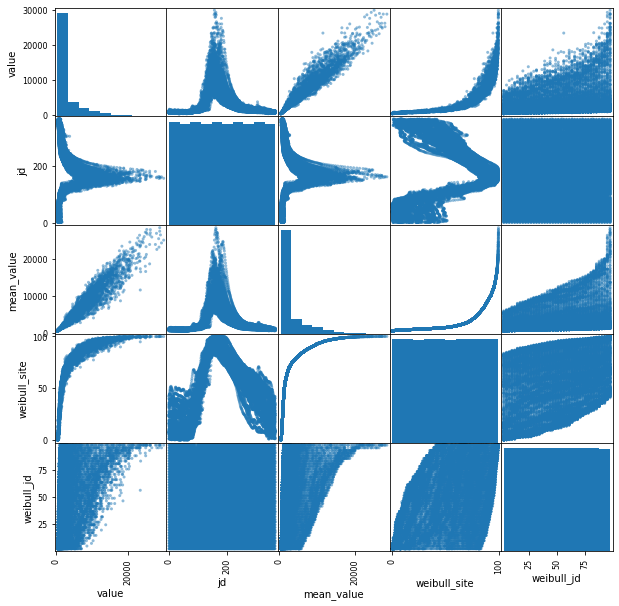

In [26]:
scatter_matrix(df_gauge, figsize=(10,10))
plt.rcParams.update({'font.size': 15})
plt.show()

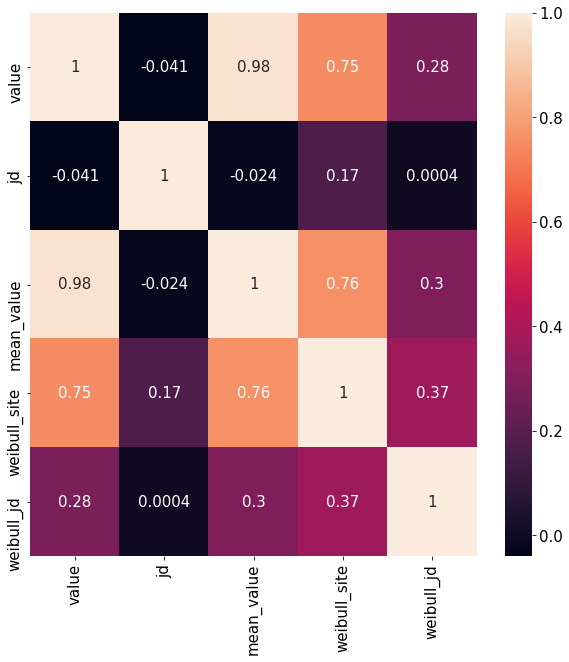

In [27]:
corr_matrix = df_gauge.corr()

f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix, annot=True)
ax = plt.rcParams.update({'font.size': 15})
plt.show()

Although the "value" and "mean_value" columns show extremely high correlation, I believe that looking at the 7-day average discharge seperately from the daily discharge may be interesting, so will keep both within the dataset.

### Check for Outliers

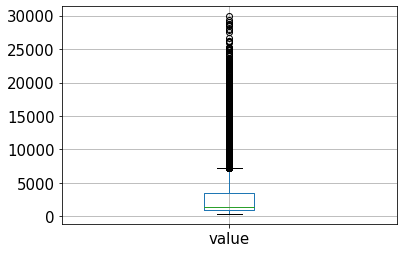

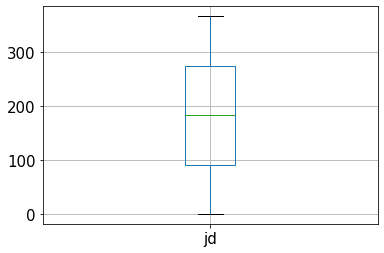

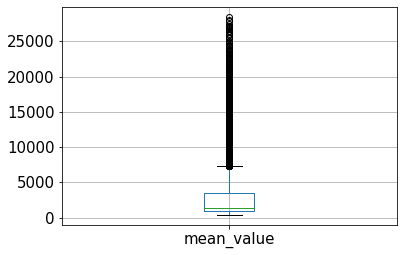

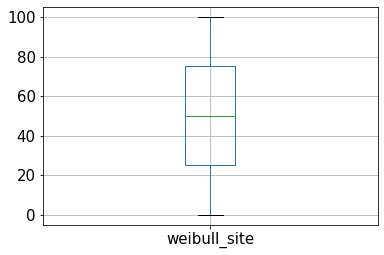

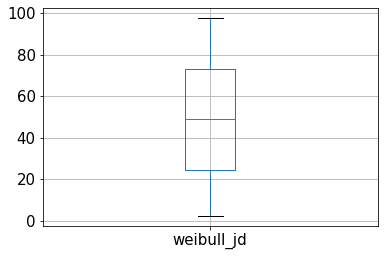

In [28]:
for i in range(0, len(df_gauge.columns)):
    df_gauge.iloc[:, i:i+1].boxplot()
    plt.show()

As expected given the environmental nature of this dataset, there are no extreme outliers, and even if there were they would likely be left in unless they were obviously created by human error.

## Clean All Unregulated Streamflow Guage Data Files

Due to the shear number of streamflow guage data files, it will be assumed that the rest follow the same data structure/issues as this first file. The steps taken to clean this first file will be emulated for the remaining streamflow gauge datasets.

In [29]:
for gauge in unregulated:
    file_path = "../Data/Streamflow_Drought_Data/Streamflow_Percentiles/" + gauge + ".csv"
    
    # Read in file
    df_gauge = pd.read_csv(
        file_path,
        index_col = "dt", 
        parse_dates=True
    )
    
    # Remove null values
    df_gauge = df_gauge.loc[df_gauge["mean_value"].notnull()]
    
    # Drop irrelevent columns
    df_gauge = df_gauge.drop(
        ["year", "month", "wy", "cy", "weibull_jd_non_exc", "weibull_jd_prev_zeros", 
         "weibull_jd_zero_length", "tlm_cdpm_20", "cdpm_pct_site", "cdpm_pct_jd"],
        axis=1
    )
    
    # Write dataframe to csv
    df_gauge.to_csv("../Data/Streamflow_Drought_Data/Streamflow_Percentiles/Clean_Unregulated_Guages/" +
                    gauge + "_Clean.csv")

### Test Opening Cleaned File

In [30]:
file_path = "../Data/Streamflow_Drought_Data/Streamflow_Percentiles/Clean_Unregulated_Guages/13011900_Clean.csv"
df_gauge = pd.read_csv(
    file_path,
    index_col = "dt", 
    parse_dates=True
)
df_gauge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14260 entries, 1980-04-07 to 2020-03-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         14260 non-null  float64
 1   jd            14260 non-null  int64  
 2   mean_value    14260 non-null  float64
 3   weibull_site  14260 non-null  float64
 4   weibull_jd    14260 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 668.4 KB


In [31]:
df_gauge.describe()

,value,jd,mean_value,weibull_site,weibull_jd
count,14260.000000,14260.000000,14260.000000,14260.000000,14260.000000
mean,536.524965,183.321669,536.512994,48.769340,48.758812
std,783.735861,105.451417,769.007765,28.204528,27.499718
min,60.000000,1.000000,78.571400,0.006844,2.439024
25%,140.000000,92.000000,139.857100,24.378893,24.390244
50%,209.000000,183.000000,209.142900,48.792006,48.780488
75%,449.000000,275.000000,449.678550,73.199986,73.170732
max,5880.000000,366.000000,5685.714300,97.597700,97.560976


In [32]:
df_gauge.head(5)

,value,jd,mean_value,weibull_site,weibull_jd
dt,,,,,
1980-04-07,108.0,98,113.5714,10.088290,4.878049
1980-04-08,103.0,99,112.2857,9.355965,4.878049
1980-04-09,114.0,100,112.1429,9.068510,4.878049
1980-04-10,112.0,101,111.7143,8.952159,4.878049
1980-04-11,105.0,102,109.7143,7.501198,4.878049


## Cleaning AMO Dataset

In [33]:
file_path = "../Data/Teleconnection_Time_Series/AMO_1950_present_monthly.csv"
df_amo = pd.read_csv(
    file_path,
    index_col = "Date", 
    parse_dates=True
)
df_amo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 864 entries, 1950-01-01 to 2021-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   864 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB


In [34]:
df_amo.describe()

,value
count,864.000000
mean,-0.351896
std,5.888811
min,-99.990000
25%,-0.163750
50%,-0.004500
75%,0.152000
max,0.513000


In [35]:
df_amo.head(5)

,value
Date,
1950-01-01,0.108
1950-02-01,-0.037
1950-03-01,-0.109
1950-04-01,-0.134
1950-05-01,-0.062


Hmmm, that minimum value is suspicious, let's check if it's a placeholder for a null value!

In [36]:
df_amo[df_amo["value"] == -99.990].index

DatetimeIndex(['2021-10-01', '2021-11-01', '2021-12-01'], dtype='datetime64[ns]', name='Date', freq=None)

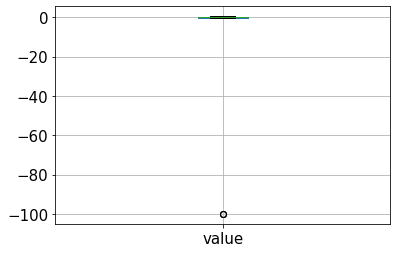

In [37]:
df_amo.iloc[:].boxplot()
plt.show()

In [38]:
df_amo.tail(5)

,value
Date,
2021-08-01,0.253
2021-09-01,0.411
2021-10-01,-99.990
2021-11-01,-99.990
2021-12-01,-99.990


Yup! Looks like they are and conveniently they are the last 3 months within the dataset, so we can just drop them and shorten our time range of investigation.

In [39]:
df_amo = df_amo.loc[df_amo["value"] != -99.990]
df_amo.describe()

,value
count,861.000000
mean,-0.004725
std,0.216120
min,-0.531000
25%,-0.163000
50%,-0.004000
75%,0.152000
max,0.513000


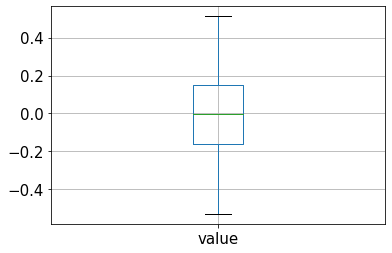

In [40]:
df_amo.iloc[:].boxplot()
plt.show()

In [41]:
df_amo.to_csv("../Data/Teleconnection_Time_Series/AMO_Clean.csv")

## Cleaning ENSO Dataset

In [42]:
file_path = "../Data/Teleconnection_Time_Series/ENSO_1950_present_monthly.csv"
df_enso = pd.read_csv(
    file_path,
    index_col = "Date", 
    parse_dates=True
)
df_enso.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 864 entries, 1950-01-01 to 2021-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   864 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB


In [43]:
df_enso.describe()

,value
count,864.000000
mean,26.602755
std,6.179599
min,-99.990000
25%,26.210000
50%,26.975000
75%,27.570000
max,29.420000


In [44]:
df_enso.head(5)

,value
Date,
1950-01-01,24.55
1950-02-01,25.06
1950-03-01,25.87
1950-04-01,26.28
1950-05-01,26.18


In [45]:
df_enso[df_enso["value"] == -99.990].index

DatetimeIndex(['2021-11-01', '2021-12-01'], dtype='datetime64[ns]', name='Date', freq=None)

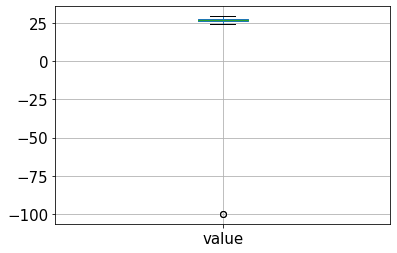

In [46]:
df_enso.iloc[:].boxplot()
plt.show()

In [47]:
df_enso.tail(5)

,value
Date,
2021-08-01,26.35
2021-09-01,26.16
2021-10-01,25.77
2021-11-01,-99.99
2021-12-01,-99.99


In [48]:
df_enso = df_enso.loc[df_enso["value"] != -99.990]
df_enso.describe()

,value
count,862.000000
mean,26.896473
std,0.981801
min,24.250000
25%,26.220000
50%,26.980000
75%,27.570000
max,29.420000


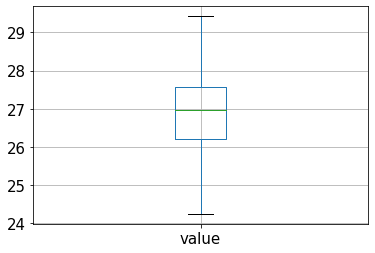

In [49]:
df_enso.iloc[:].boxplot()
plt.show()

In [50]:
df_enso.to_csv("../Data/Teleconnection_Time_Series/ENSO_Clean.csv")

## Cleaning PDO Dataset

In [51]:
file_path = "../Data/Teleconnection_Time_Series/PDO_1950_present_monthly.csv"
df_pdo = pd.read_csv(
    file_path,
    index_col = "Date", 
    parse_dates=True
)
df_pdo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 864 entries, 1950-01-01 to 2021-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   864 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB


In [52]:
df_pdo.describe()

,value
count,864.000000
mean,-23.287648
std,480.792398
min,-9999.000000
25%,-0.837000
50%,-0.149000
75%,0.531750
max,2.382000


In [53]:
df_pdo.head(5)

,value
Date,
1950-01-01,-1.317
1950-02-01,-1.654
1950-03-01,-1.346
1950-04-01,-1.402
1950-05-01,-2.423


In [54]:
df_pdo[df_pdo["value"] == -9999.0].index

DatetimeIndex(['2021-11-01', '2021-12-01'], dtype='datetime64[ns]', name='Date', freq=None)

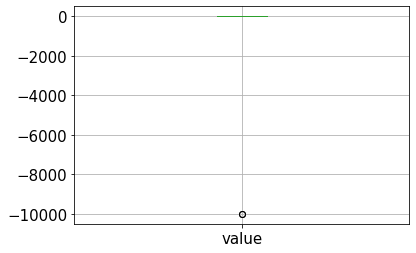

In [55]:
df_pdo.iloc[:].boxplot()
plt.show()

In [56]:
df_pdo.tail(5)

,value
Date,
2021-08-01,-0.719
2021-09-01,-1.645
2021-10-01,-2.648
2021-11-01,-9999.000
2021-12-01,-9999.000


In [57]:
df_pdo = df_pdo.loc[df_pdo["value"] != -9999.0]
df_pdo.describe()

,value
count,862.000000
mean,-0.142144
std,0.944523
min,-2.648000
25%,-0.831250
50%,-0.142000
75%,0.537250
max,2.382000


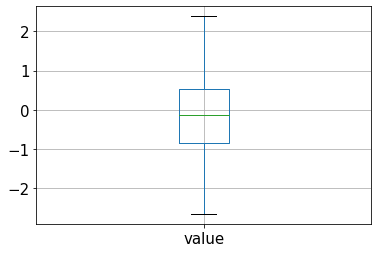

In [58]:
df_pdo.iloc[:].boxplot()
plt.show()

In [59]:
df_pdo.to_csv("../Data/Teleconnection_Time_Series/PDO_Clean.csv")

## Cleaning PNA Dataset

In [60]:
file_path = "../Data/Teleconnection_Time_Series/PNA_1950_present_monthly.csv"
df_pna = pd.read_csv(
    file_path,
    index_col = "Date", 
    parse_dates=True
)
df_pna.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 864 entries, 1950-01-01 to 2021-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   864 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB


In [61]:
df_pna.describe()

,value
count,864.000000
mean,-0.336412
std,4.908525
min,-99.900000
25%,-0.792500
50%,-0.080000
75%,0.600000
max,2.870000


In [62]:
df_pna.head(5)

,value
Date,
1950-01-01,-3.65
1950-02-01,-1.69
1950-03-01,-0.06
1950-04-01,-0.23
1950-05-01,-0.40


In [63]:
df_pna[df_pna["value"] == -99.90].index

DatetimeIndex(['2021-11-01', '2021-12-01'], dtype='datetime64[ns]', name='Date', freq=None)

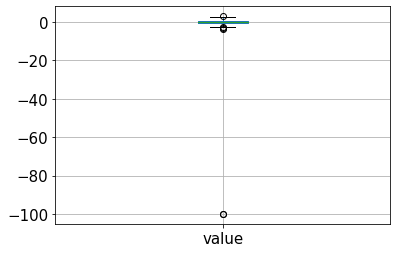

In [64]:
df_pna.iloc[:].boxplot()
plt.show()

In [65]:
df_pna.tail(5)

,value
Date,
2021-08-01,0.93
2021-09-01,0.33
2021-10-01,1.41
2021-11-01,-99.90
2021-12-01,-99.90


In [66]:
df_pna = df_pna.loc[df_pna["value"] != -99.90]
df_pna.describe()

,value
count,862.000000
mean,-0.105406
std,1.034244
min,-3.650000
25%,-0.787500
50%,-0.080000
75%,0.600000
max,2.870000


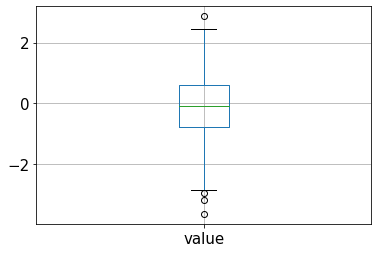

In [67]:
df_pna.iloc[:].boxplot()
plt.show()

In [68]:
df_pna.to_csv("../Data/Teleconnection_Time_Series/PNA_Clean.csv")

## Cleaning Sun Spot Dataset

In [69]:
file_path = "../Data/Teleconnection_Time_Series/Sunspots_1978_present_daily.csv"
df_sun = pd.read_csv(
    file_path,
    index_col = "Date", 
    parse_dates=True
)
df_sun.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15645 entries, 1978-01-01 to 2020-10-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dailyn       15645 non-null  float64
 1   Dailys       15645 non-null  float64
 2   Dailyn_area  15645 non-null  float64
 3   Dailys_area  15645 non-null  float64
 4   Daily_n_t06  15645 non-null  float64
 5   Daily_s_t06  15645 non-null  float64
 6   Dailyn_sil   15645 non-null  int64  
 7   Dailys_sil   15645 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.1 MB


In [70]:
df_sun.describe()

,Dailyn,Dailys,Dailyn_area,Dailys_area,Daily_n_t06,Daily_s_t06,Dailyn_sil,Dailys_sil
count,15645.000000,15645.000000,15645.00000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000
mean,41.786731,45.367715,41.38032,44.592873,34.111282,37.466187,20.409588,22.181783
std,45.955563,47.145307,50.77372,51.139299,48.117646,49.456669,32.834936,34.924649
min,0.000000,0.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,26.000000,32.000000,22.00000,28.000000,10.000000,13.000000,0.000000,0.000000
75%,66.000000,73.000000,65.00000,71.100000,58.500000,66.500000,32.000000,36.000000
max,286.200000,294.500000,301.50000,310.300000,286.200000,294.500000,259.000000,245.000000


In [71]:
df_sun.head(5)

,Dailyn,Dailys,Dailyn_area,Dailys_area,Daily_n_t06,Daily_s_t06,Dailyn_sil,Dailys_sil
Date,,,,,,,,
1978-01-01,50.9,76.1,53.0,74.0,50.9,76.1,-1,-1
1978-01-02,65.5,67.5,78.7,54.3,65.5,67.5,-1,-1
1978-01-03,94.7,52.3,91.2,55.8,94.7,52.3,-1,-1
1978-01-04,109.4,36.6,114.5,31.5,109.4,36.6,-1,-1
1978-01-05,82.8,46.2,85.7,43.3,82.8,46.2,-1,-1


### Rename Columns

In [72]:
orig_columns = df_sun.columns.values.tolist()

In [73]:
for name in range(0, len(orig_columns)):
    df_sun[orig_columns[name][5:]] = df_sun[orig_columns[name]]
    df_sun = df_sun.drop([orig_columns[name]], axis=1)
df_sun.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15645 entries, 1978-01-01 to 2020-10-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       15645 non-null  float64
 1   s       15645 non-null  float64
 2   n_area  15645 non-null  float64
 3   s_area  15645 non-null  float64
 4   _n_t06  15645 non-null  float64
 5   _s_t06  15645 non-null  float64
 6   n_sil   15645 non-null  int64  
 7   s_sil   15645 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.1 MB


In [74]:
df_sun["n_t06"] = df_sun["_n_t06"]
df_sun = df_sun.drop(["_n_t06"], axis=1)

df_sun["s_t06"] = df_sun["_s_t06"]
df_sun = df_sun.drop(["_s_t06"], axis=1)
df_sun.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15645 entries, 1978-01-01 to 2020-10-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       15645 non-null  float64
 1   s       15645 non-null  float64
 2   n_area  15645 non-null  float64
 3   s_area  15645 non-null  float64
 4   n_sil   15645 non-null  int64  
 5   s_sil   15645 non-null  int64  
 6   n_t06   15645 non-null  float64
 7   s_t06   15645 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.1 MB


### Clean Null Values

Valid sun spot values are always positive, so these -1 values must be representing null values.

In [75]:
df_sun = df_sun.replace(-1.0, np.nan)
df_sun.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15645 entries, 1978-01-01 to 2020-10-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       15645 non-null  float64
 1   s       15645 non-null  float64
 2   n_area  14153 non-null  float64
 3   s_area  14153 non-null  float64
 4   n_sil   10532 non-null  float64
 5   s_sil   10532 non-null  float64
 6   n_t06   9862 non-null   float64
 7   s_t06   9862 non-null   float64
dtypes: float64(8)
memory usage: 1.1 MB


In [76]:
df_sun.describe()

,n,s,n_area,s_area,n_sil,s_sil,n_t06,s_t06
count,15645.000000,15645.000000,14153.000000,14153.000000,10532.000000,10532.000000,9862.000000,9862.000000
mean,41.786731,45.367715,45.848025,49.399244,30.803361,33.435910,54.700264,60.022460
std,45.955563,47.145307,51.385210,51.465410,35.651069,37.740572,50.261277,50.038204
min,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.700000,6.500000,0.000000,0.000000,13.000000,18.000000
50%,26.000000,32.000000,28.400000,35.100000,19.000000,21.000000,42.450000,52.600000
75%,66.000000,73.000000,71.400000,77.000000,47.000000,54.000000,87.100000,90.800000
max,286.200000,294.500000,301.500000,310.300000,259.000000,245.000000,286.200000,294.500000


I am going to guess that this one -0.1 value is an input error and replace it with a 0.

In [77]:
df_sun.loc[df_sun["s_area"] == -0.1] = 0.0

In [78]:
df_sun.describe()

,n,s,n_area,s_area,n_sil,s_sil,n_t06,s_t06
count,15645.000000,15645.000000,14153.000000,14153.000000,10533.000000,10533.000000,9862.000000,9862.000000
mean,41.783726,45.367715,45.844704,49.399251,30.800437,33.432735,54.695498,60.022460
std,45.956758,47.145307,51.386654,51.465403,35.650640,37.740186,50.264235,50.038204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.700000,6.500000,0.000000,0.000000,13.000000,18.000000
50%,26.000000,32.000000,28.400000,35.100000,19.000000,21.000000,42.400000,52.600000
75%,66.000000,73.000000,71.400000,77.000000,47.000000,54.000000,87.100000,90.800000
max,286.200000,294.500000,301.500000,310.300000,259.000000,245.000000,286.200000,294.500000


In [79]:
df_sun.loc[df_sun["n_area"].isnull()].index

DatetimeIndex(['2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04',
               '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08',
               '2016-10-09', '2016-10-10',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', name='Date', length=1492, freq=None)

In [80]:
df_sun.loc[df_sun["s_area"].isnull()].index

DatetimeIndex(['2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04',
               '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08',
               '2016-10-09', '2016-10-10',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', name='Date', length=1492, freq=None)

In [81]:
df_sun.loc[df_sun["n_sil"].isnull()].index

DatetimeIndex(['1978-01-01', '1978-01-02', '1978-01-03', '1978-01-04',
               '1978-01-05', '1978-01-06', '1978-01-07', '1978-01-08',
               '1978-01-09', '1978-01-10',
               ...
               '1991-12-22', '1991-12-23', '1991-12-24', '1991-12-25',
               '1991-12-26', '1991-12-27', '1991-12-28', '1991-12-29',
               '1991-12-30', '1991-12-31'],
              dtype='datetime64[ns]', name='Date', length=5112, freq=None)

In [82]:
df_sun.loc[df_sun["s_sil"].isnull()].index

DatetimeIndex(['1978-01-01', '1978-01-02', '1978-01-03', '1978-01-04',
               '1978-01-05', '1978-01-06', '1978-01-07', '1978-01-08',
               '1978-01-09', '1978-01-10',
               ...
               '1991-12-22', '1991-12-23', '1991-12-24', '1991-12-25',
               '1991-12-26', '1991-12-27', '1991-12-28', '1991-12-29',
               '1991-12-30', '1991-12-31'],
              dtype='datetime64[ns]', name='Date', length=5112, freq=None)

In [83]:
df_sun.loc[df_sun["n_t06"].isnull()].index

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', name='Date', length=5783, freq=None)

In [84]:
df_sun.loc[df_sun["s_t06"].isnull()].index

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', name='Date', length=5783, freq=None)

As expected, the pairs of variables are missing the same values. I unfortunately do not know what the "n_area", "s_area", "n_sil", "s_sil", "n_t06", or "s_t06" columns represent due to lacking metadata, but I will hopefully figure that out once I can get back in touch with the dataset provider. For now, I will only use the "n" and "s" columns due to having perfect daily data for them:
- "n" = Number of sun_spots in the Northern Hemisphere
- "s" = Number of sun_spots in the Southern Hemisphere

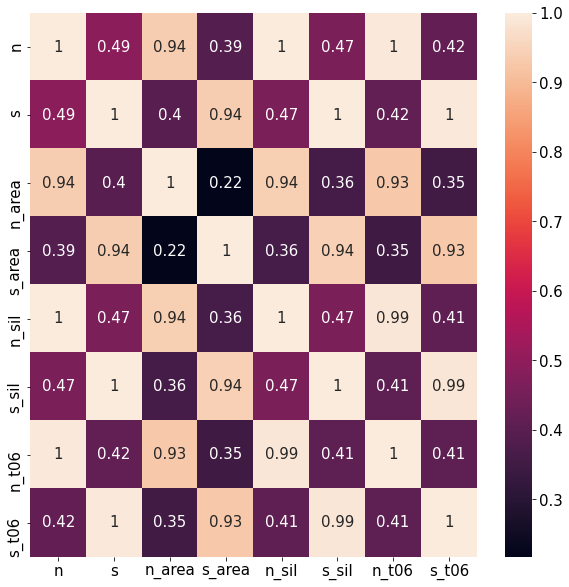

In [85]:
corr_matrix = df_sun.corr()

f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix, annot=True)
ax = plt.rcParams.update({'font.size': 15})
plt.show()

### Drop Columns

In [86]:
df_sun = df_sun.drop(
    ["n_area", "s_area", "n_sil", "s_sil", "n_t06", "s_t06"], 
    axis=1
)
df_sun.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15645 entries, 1978-01-01 to 2020-10-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       15645 non-null  float64
 1   s       15645 non-null  float64
dtypes: float64(2)
memory usage: 366.7 KB


In [87]:
df_sun["sun_spots_north"] = df_sun["n"]
df_sun["sun_spots_south"] = df_sun["s"]
df_sun = df_sun.drop(["n", "s"], axis=1)
df_sun.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15645 entries, 1978-01-01 to 2020-10-31
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sun_spots_north  15645 non-null  float64
 1   sun_spots_south  15645 non-null  float64
dtypes: float64(2)
memory usage: 366.7 KB


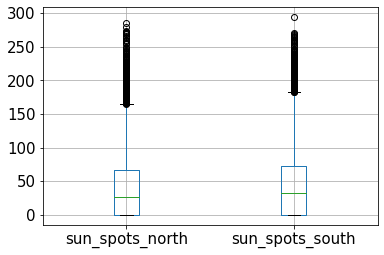

In [88]:
df_sun.iloc[:].boxplot()
plt.show()

In [89]:
df_sun.to_csv("../Data/Teleconnection_Time_Series/Sun_Spots_Clean.csv")